In [1]:
## 1: Importing the libraries
import pandas as pd
import numpy as np

In [2]:
##2: Importing dataset
data = pd.read_csv('Data.csv')
X = data.iloc[ : , :-1].values
Y = data.iloc[ : , 3].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [3]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [4]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')
print("Original Data : \n", data)
# Fitting the data to the imputer object
imputer = imputer.fit(data)
 
# Imputing the data    
data_SI = imputer.transform(data)
print(f"updated dataframe: \n {data_SI}")

Original Data : 
    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes
updated dataframe: 
 [['France' 44.0 72000.0 'No']
 ['Spain' 27.0 48000.0 'Yes']
 ['Germany' 30.0 54000.0 'No']
 ['Spain' 38.0 61000.0 'No']
 ['Germany' 40.0 48000.0 'Yes']
 ['France' 35.0 58000.0 'Yes']
 ['Spain' 27.0 52000.0 'No']
 ['France' 48.0 79000.0 'Yes']
 ['Germany' 50.0 83000.0 'No']
 ['France' 37.0 67000.0 'Yes']]


In [6]:
data.loc[:,"Age":"Salary"]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [7]:

from sklearn.impute import KNNImputer
# Select the column you want to impute
column_to_impute = data[['Salary','Age']]

# Fit the KNN Imputer on the selected column
imputer = KNNImputer(n_neighbors=3,weights="distance")
imputer.fit(column_to_impute)

# Use the transform method to impute the missing values in the selected column
imputed_column = imputer.transform(column_to_impute)
print(imputed_column)
data[['Salary','Age']]=imputed_column
print(data)

[[7.20000000e+04 4.40000000e+01]
 [4.80000000e+04 2.70000000e+01]
 [5.40000000e+04 3.00000000e+01]
 [6.10000000e+04 3.80000000e+01]
 [6.53846154e+04 4.00000000e+01]
 [5.80000000e+04 3.50000000e+01]
 [5.20000000e+04 3.00909091e+01]
 [7.90000000e+04 4.80000000e+01]
 [8.30000000e+04 5.00000000e+01]
 [6.70000000e+04 3.70000000e+01]]
   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  65384.615385       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  30.090909  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


In [8]:
data1=data["Country"].ravel()

In [9]:
data1

array(['France', 'Spain', 'Germany', 'Spain', 'Germany', 'France',
       'Spain', 'France', 'Germany', 'France'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
# Select the column to encode
col_1 = data['Country']
# Create the LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the column
le.fit(col_1)
# Encode the column
encoded_col = le.transform(col_1)

# Replace the original column with the encoded column
data['Country'] = encoded_col
data

,Country,Age,Salary,Purchased
0,0,44.000000,72000.000000,No
1,2,27.000000,48000.000000,Yes
2,1,30.000000,54000.000000,No
3,2,38.000000,61000.000000,No
4,1,40.000000,65384.615385,Yes
5,0,35.000000,58000.000000,Yes
6,2,30.090909,52000.000000,No
7,0,48.000000,79000.000000,Yes
8,1,50.000000,83000.000000,No
9,0,37.000000,67000.000000,Yes


In [11]:
#data['Purchased'].value_counts().to_dict()
#data.replace({'No': 0, 'Yes': 1},inplace=True)
#data

In [12]:
from sklearn.preprocessing import LabelEncoder
# Select the column to encode
col_2 = data['Purchased']
# Create the LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the column
le.fit(col_2)
# Encode the column
encoded_col = le.transform(col_2)

# Replace the original column with the encoded column
data['Purchased'] = encoded_col
data
# same code combine
# le.fit(data['Purchased'])
# data['Purchased'] = le.transform(data['Purchased'])

,Country,Age,Salary,Purchased
0,0,44.000000,72000.000000,0
1,2,27.000000,48000.000000,1
2,1,30.000000,54000.000000,0
3,2,38.000000,61000.000000,0
4,1,40.000000,65384.615385,1
5,0,35.000000,58000.000000,1
6,2,30.090909,52000.000000,0
7,0,48.000000,79000.000000,1
8,1,50.000000,83000.000000,0
9,0,37.000000,67000.000000,1


In [13]:
# # Decode the encoded column
# decoded_col = le.inverse_transform(encoded_col)

# # Replace the encoded column with the decoded column
# data['Country'] = decoded_col
# data

In [14]:
data

,Country,Age,Salary,Purchased
0,0,44.000000,72000.000000,0
1,2,27.000000,48000.000000,1
2,1,30.000000,54000.000000,0
3,2,38.000000,61000.000000,0
4,1,40.000000,65384.615385,1
5,0,35.000000,58000.000000,1
6,2,30.090909,52000.000000,0
7,0,48.000000,79000.000000,1
8,1,50.000000,83000.000000,0
9,0,37.000000,67000.000000,1


In [15]:
##2: Importing dataset for onehotencoder
df = pd.read_csv('Data.csv')
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = ['Country', 'Purchased']
X = df[categorical_columns]

# Create the OneHotEncoder object
ohe = OneHotEncoder()

# Fit the OneHotEncoder object on the categorical columns
ohe.fit(X)

# Encode the categorical columns
X_encoded = ohe.transform(X,)

# Encode the categorical columns as a dense array
# X_encoded = ohe.transform(X, sparse=False)
(X_encoded)

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [16]:
# Select the non-categorical columns
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
X_non_categorical = df[non_categorical_columns]

# Concatenate the encoded columns with the non-categorical columns
df_encoded = pd.concat([pd.DataFrame(X_encoded), X_non_categorical], axis=1)
df_encoded

,0,Age,Salary
0,"(0, 0)\t1.0\n (0, 3)\t1.0",44.0,72000.0
1,"(0, 2)\t1.0\n (0, 4)\t1.0",27.0,48000.0
2,"(0, 1)\t1.0\n (0, 3)\t1.0",30.0,54000.0
3,"(0, 2)\t1.0\n (0, 3)\t1.0",38.0,61000.0
4,"(0, 1)\t1.0\n (0, 4)\t1.0",40.0,NaN
5,"(0, 0)\t1.0\n (0, 4)\t1.0",35.0,58000.0
6,"(0, 2)\t1.0\n (0, 3)\t1.0",NaN,52000.0
7,"(0, 0)\t1.0\n (0, 4)\t1.0",48.0,79000.0
8,"(0, 1)\t1.0\n (0, 3)\t1.0",50.0,83000.0
9,"(0, 0)\t1.0\n (0, 4)\t1.0",37.0,67000.0


In [17]:
df_Country = pd.get_dummies(df['Country'],prefix="Country")
df_Country

,Country_France,Country_Germany,Country_Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [18]:
data

,Country,Age,Salary,Purchased
0,0,44.000000,72000.000000,0
1,2,27.000000,48000.000000,1
2,1,30.000000,54000.000000,0
3,2,38.000000,61000.000000,0
4,1,40.000000,65384.615385,1
5,0,35.000000,58000.000000,1
6,2,30.090909,52000.000000,0
7,0,48.000000,79000.000000,1
8,1,50.000000,83000.000000,0
9,0,37.000000,67000.000000,1


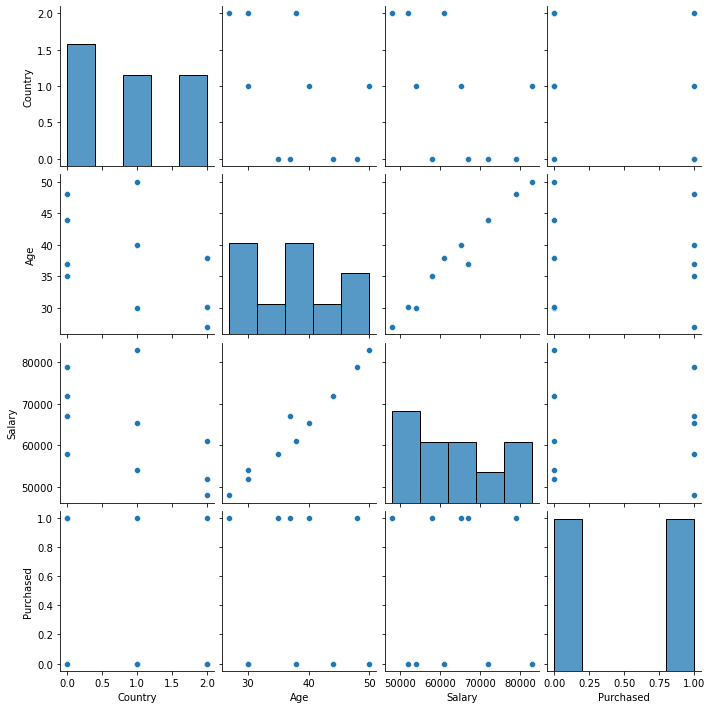

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)

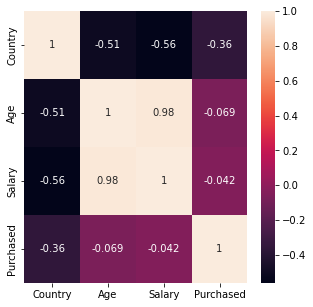

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)
plt.savefig("Correlation Matrix.png")

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
X_train

array([[ 0.13483997,  0.40660927,  0.27015018],
       [-0.94387981, -0.06010746,  0.43886851],
       [ 1.21355975, -1.61582989, -1.54558041],
       [ 1.21355975, -1.13497023, -1.12780169],
       [-0.94387981,  1.65118722,  1.69220467],
       [ 1.21355975,  0.09546479, -0.18779957],
       [-0.94387981,  1.02889824,  0.96109191],
       [-0.94387981, -0.37125194, -0.50113361]])

In [34]:
X_test

array([[ 0., -1., -1.],
       [ 0.,  1.,  1.]])

In [23]:
X = data.iloc[ : , :-1].values
Y = data.iloc[ : , 3].values
## Splitting the datasets into training sets and Test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)